# Курсовой проект по курсу "Теория вероятностей и математическая статистика"

In [256]:
import warnings

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import probplot
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
import re


In [257]:
data = pd.read_csv('topSubscribed.csv')

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [259]:
data.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [260]:
data = data.replace(',','', regex=True)

In [261]:
data.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012


In [262]:
for i in range(0, len(data.columns)):
    data.iloc[:,i] = pd.to_numeric(data.iloc[:,i], errors='ignore')

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   int64 
 3   Video Views      1000 non-null   int64 
 4   Video Count      1000 non-null   int64 
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [264]:
data.describe().applymap('{:,.2f}'.format)

,Rank,Subscribers,Video Views,Video Count,Started
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,500.50,"21,581,400.00","9,994,912,409.73","9,416.23","2,012.59"
std,288.82,"16,625,563.55","13,005,457,456.50","32,190.91",4.11
min,1.00,"11,400,000.00",0.00,0.00,"1,970.00"
25%,250.75,"13,400,000.00","3,871,469,970.25",365.50,"2,010.00"
50%,500.50,"16,600,000.00","6,723,360,159.00",896.00,"2,013.00"
75%,750.25,"23,200,000.00","12,230,520,916.75","3,277.25","2,015.00"
max,"1,000.00","234,000,000.00","212,900,271,553.00","342,802.00","2,021.00"


Найду среднее значение Subscribers

In [265]:
mean_Subscribers = data['Subscribers'].sum() / data['Subscribers'].count()
mean_Subscribers
# по формуле

21581400.0

In [266]:
data['Subscribers'].mean()

21581400.0

In [267]:
Subscribers_std = np.sqrt(((data['Subscribers'] - data['Subscribers'].mean())**2).sum() / data['Subscribers'].count())
Subscribers_std
# среднее квадратичное отклонение

16617248.69044211

In [268]:
Subscribers_variance = ((data['Subscribers'] - data['Subscribers'].mean())**2).sum() / data['Subscribers'].count()
Subscribers_variance
#дисперсия

276132954040000.0

In [269]:
Subscribers_variance2 = ((data['Subscribers'] - data['Subscribers'].mean())**2).sum() / (data['Subscribers'].count() - 1)
Subscribers_variance2
# несмещенная дисперсия

276409363403403.4

In [270]:
data['Subscribers'].var(ddof=0)
# С помощью метода var считаю смещенную оценку дисперсии

276132954040000.0

In [271]:
data['Subscribers'].var(ddof=1)
# Несмещенная

276409363403403.4

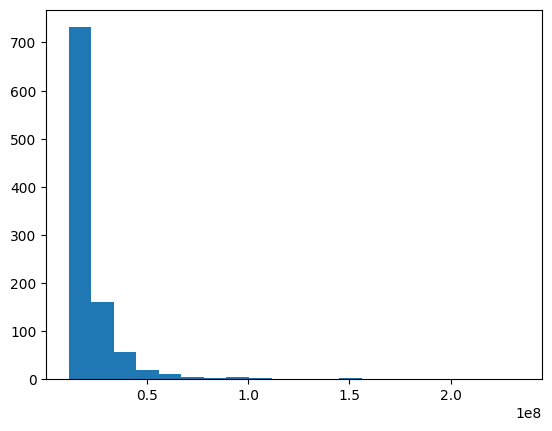

In [272]:
plt.hist(data['Subscribers'], bins = 20)
plt.show()
#Строю гистограмму указав в качестве аргумента bins число 20, чтобы получить более детальную картину

In [273]:
corr_matrix = data.loc[:, ['Video Count', 'Video Views']].corr()
corr_matrix
# считаю корреляцию Video Views с Video Count 
# получил матрицу корреляций

,Video Count,Video Views
Video Count,1.000000,0.151196
Video Views,0.151196,1.000000


In [274]:
corr_matrix.loc['Video Count', 'Video Views']
# Величина корреляции положительна, так что можно сделать вывод, что чем больше видео, тем больше просмотров

0.15119615220340274

### Линейная регрессия

<function matplotlib.pyplot.show(close=None, block=None)>

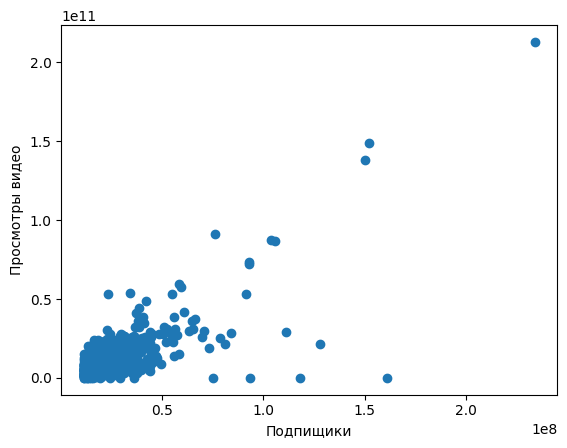

In [312]:
plt.scatter(data['Subscribers'], data['Video Views'])
plt.xlabel('Подпищики')
plt.ylabel('Просмотры видео')
plt.show

In [300]:
model = LinearRegression()

In [297]:
x = pd.DataFrame(data.Subscribers)

In [298]:
y = pd.DataFrame(data['Video Views'])

In [301]:
model.fit(x, y)

LinearRegression()

In [302]:
model.coef_

array([[589.54600982]])

<function matplotlib.pyplot.show(close=None, block=None)>

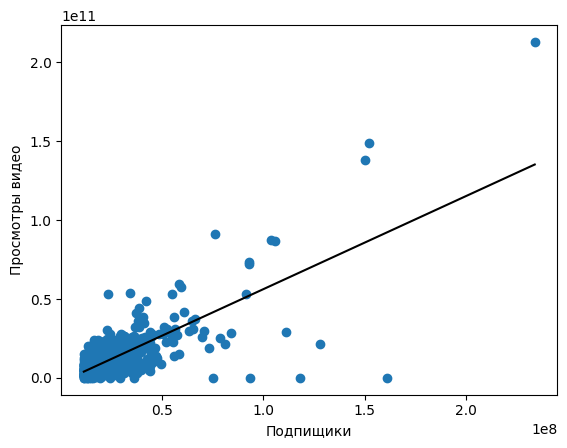

In [311]:
plt.scatter(data['Subscribers'], data['Video Views'])
plt.plot(x, model.predict(x), color = 'black')
plt.xlabel('Подпищики')
plt.ylabel('Просмотры видео')
plt.show

In [314]:
model.score(x, y)

0.5679850357321219

Заключение.
Полохо, что нет четких тем курсовых работи что надо именно сдеать.
